**Project 1 - SHARKS**

# Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Hypotheses

- Based on reports by activity and fatality, we could identify the *top10 most lethal activities.*
- Based on reports by month and country, it would be possible to identify a 'Shark season' i. e. the months were most attacks occur, which might as well be related to migratory events. Has these changed over the years? -> Global warming, climate change.
- Based on reports by fatality and time: **(will work on it if enough time)**
    - More deaths at night due to people not seeing shark approach?


# Analysis (& further cleaning of chosen variables)

In [3]:
sharks_clean = pd.read_csv('./data/sharks_clean.csv', encoding = "unicode_escape")

In [4]:
sharks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [5]:
sharks_clean.shape # Based on cleaning I'm sure that these reports have at least 50% of information
# Since they had non-NaN in 8 out of 16 columns

(6302, 16)

## 'Shark Season' by Country

### Extracting and cleaning Month

Which column do I use to extract the month? Case Number and Date contain this information. Let's see which one has less NaN

In [6]:
sharks_clean["Case Number"].isna().sum()

1

In [7]:
sharks_clean["Date"].isna().sum()

0

Basically the same, let's see which one looks cleaner

In [8]:
list_case_number = sharks_clean["Case Number"].tolist()

In [9]:
#print(list_case_number)

In [10]:
list_date = sharks_clean["Date"].tolist() 
# I think it would be better to use this with regex selection [A-Za-z]{3} or similar
# Find those instances in which occur and create new column with the month

In [11]:
#print(list_date)

After checking the list, if they do not follow the regex -(\w{3})- the date is not really clear. Extract these and replace by NaN the others.

In [12]:
# (Jan|Feb|Mar|Apr|Mar|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)

In [13]:
sharks_clean["Month"] = sharks_clean["Date"].str.lower().str.extract(r'-(\w{3})-')

In [14]:
sharks_clean.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
1068,2009.12.06,05-Dec-2009,2009.0,Provoked,USA,New Jersey,"Adventure Aquarium, Camden",Diving,Robert Large,M,58,Lacerations & puncture wounds to right calf & ...,N,13h00,"Sandtiger shark, 8'","R. Large; Philadelphia Daily News, 4/22/2010",dec


In [15]:
sharks_clean.tail(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,NaN


In [16]:
list_month = sharks_clean["Month"].tolist()

In [17]:
len(list_month)

6302

In [18]:
sharks_clean["Month"].isna().sum() # 910 out of 6302, not bad - let's remove them

910

In [19]:
sharks_clean = sharks_clean[sharks_clean['Month'].notna()]

In [20]:
sharks_clean.shape

(5392, 17)

In [21]:
sharks_clean.groupby("Month").indices.keys() # Month: x-axis but would need to recode to order them

dict_keys(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'])

We need the Month to be codified (1-12) so that the months are then properly ordered: create new column where if jan->1, if feb->2...

In [22]:
# Creating a dictionary to store the old and new names for months:

dict_months = {"jan" : 1,
              "feb" : 2,
              "mar" : 3,
              "apr" : 4,
              "may" : 5,
              "jun" : 6,
              "jul" : 7,
              "aug" : 8,
              "sep" : 9,
              "oct" : 10,
              "nov" : 11,
              "dec" : 12              
}

# Replacing the name by value

sharks_clean.replace({"Month" : dict_months}, inplace = True)

In [23]:
sharks_clean.sample() # It worked

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
1918,2001.08.19.c,19-Aug-2001,2001.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Robert Kurrek,M,32,Cuts on right foot,N,13h14,NaN,"S. Petersohn, GSAF; Orlando Sentinel, 8/20/200...",8


In [24]:
sharks_clean.groupby("Month").indices.keys() # Now they will be automatically ordered in the graph

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [25]:
sharks_clean.groupby("Month").size() # Number of reports each month: y-axis

Month
1     494
2     356
3     381
4     420
5     358
6     475
7     621
8     556
9     521
10    417
11    378
12    415
dtype: int64

### Cleaning Country

In [26]:
sharks_clean["Country"] = sharks_clean["Country"].str.strip().str.upper() # Just in case

In [27]:
sharks_clean["Country"].isna().sum()

31

In [28]:
sharks_clean = sharks_clean[sharks_clean['Country'].notna()] # Keeping not NaN

In [29]:
sharks_clean.shape

(5361, 17)

In [30]:
sharks_clean["Country"].value_counts() # Looks messy let's see if we can group something here

USA                         2051
AUSTRALIA                   1227
SOUTH AFRICA                 523
NEW ZEALAND                  111
BRAZIL                       106
                            ... 
ARGENTINA                      1
GUATEMALA                      1
NETHERLANDS ANTILLES           1
MALDIVES                       1
BETWEEN PORTUGAL & INDIA       1
Name: Country, Length: 168, dtype: int64

In [31]:
list_country = sharks_clean["Country"].tolist() # If I take top 3 looks good
#print(list_country)

### Visualization

Let's plot the counts of reports by month and country

In [32]:
# Defining filtering conditions for top 3 countries:

usa = (sharks_clean["Country"] == "USA")
australia = (sharks_clean["Country"] == "AUSTRALIA")
south_africa = (sharks_clean["Country"] == "SOUTH AFRICA")

In [33]:
# Checking that filters work:

sharks_clean[south_africa].sample() # ok works

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
2901,1984.02.18,18-Feb-1984,1984.0,Provoked,SOUTH AFRICA,Eastern Cape Province,"Paradise Beach, JeffreyÂs Bay",Fishing,Henri deVilliers Melville,M,NaN,Leg lacerated by hooked shark PROVOKED INCIDENT,N,Night,"Raggedtooth shark, 56-kg [123-lb]","M. Levine, GSAF; Eastern Province Herald, 6/28...",2


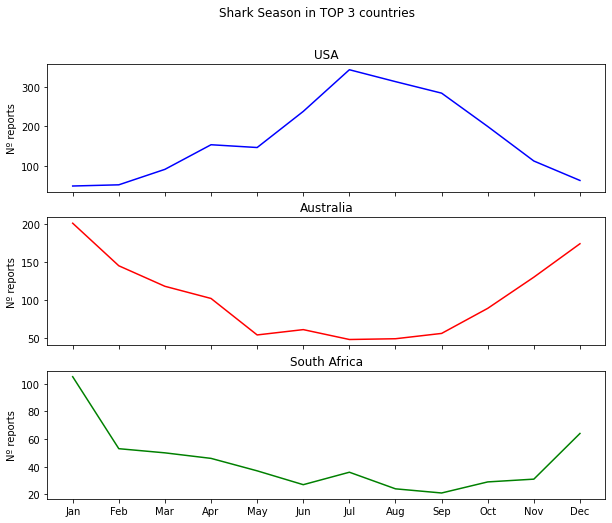

In [34]:
fig_month_country, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(10,8)) # preparing the environment: graphs to be filled

fig_month_country.suptitle('Shark Season in TOP 3 countries')

# x axis:
x = sharks_clean.groupby("Month").indices.keys()
  
# y axes: y1 (top graph - USA), y2 (middle graph - AUSTRALIA), y3 (bottom graph - SOUTH AFRICA):
y1 = sharks_clean[usa].groupby("Month").size()
y2 = sharks_clean[australia].groupby("Month").size()
y3 = sharks_clean[south_africa].groupby("Month").size()

# first graph, USA
plt.sca(ax[0])
plt.plot(x, y1, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('USA')

# second graph, AUSTRALIA  
plt.sca(ax[1])
plt.plot(x, y2, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('Australia')

# third graph, SOUTH AFRICA  
plt.sca(ax[2])
plt.plot(x, y3, 'g')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('South Africa')

plt.show() 

**Conclusions:** 
- Shark season is Jun-Oct in USA
- Shark season is Dec-Feb in Australia and South Africa
  
We could use this approach to check Shark season in different countries/regions (for instance: East vs West-coast of USA).  

Now, Shark Season might look different in the past, since global warming is affecting their habitats.
Let's see if it changes by year.  
Start of industrialization: year 1760 - but we migt not have many reports on those years.

## 'Shark season' by year - Climate change

### Cleaning Year

In [35]:
sharks_clean["Year"].unique() # We might need to focus on USA & Australia since they have the most reports by month

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [36]:
sharks_clean["Year"].value_counts()

2015.0    141
2017.0    133
2016.0    129
2011.0    127
2014.0    122
         ... 
1851.0      1
1850.0      1
1831.0      1
1834.0      1
1869.0      1
Name: Year, Length: 210, dtype: int64

Let's clean the Year column, just remove the zeros and delete those for which I have no year.  
Also I could bin them in spans of 20 years?

In [37]:
# Convert to int and fill NaN with 0 

try:
    sharks_clean["Year"] = sharks_clean["Year"].astype(int)
except Exception:
    sharks_clean['Year'] = sharks_clean['Year'].fillna(0).astype(int)

In [38]:
print(sharks_clean.dtypes) # Converted to int

Case Number               object
Date                      object
Year                       int32
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
Month                      int64
dtype: object


In [39]:
sharks_clean["Year"].unique() # Filled NaN with 0

array([2018, 2017,    0, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954,
       1953, 1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922,
       1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911,
       1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900,
       1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889,
       1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878,
       1877, 1876, 1875, 1874, 1873, 1872, 1871, 18

In [40]:
# Let's remove the rows in which year = 0

year_zero = sharks_clean['Year'] == 0
sharks_clean = sharks_clean.drop(sharks_clean[year_zero].index)

In [41]:
sharks_clean.tail(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
6156,1738.04.06.R,Reported 06-Apr-1738,1738,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",4
6160,1703.03.26,26-Mar-1703,1703,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,"Samuel Jennings, a deserter from the British f...",M,19,"Hand and foot severely bitten, surgically ampu...",N,Night,NaN,"W.R.Cutter, Vol.1, p.252",3
6170,1580.01.10.R,Letter dated 10-Jan-1580,1580,Unprovoked,BETWEEN PORTUGAL & INDIA,NaN,NaN,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",Y,NaN,NaN,"G.P. Whitley, p. 10",1


In [42]:
sharks_clean.shape # Removed

(5352, 17)

### Reports by year (worldwide)

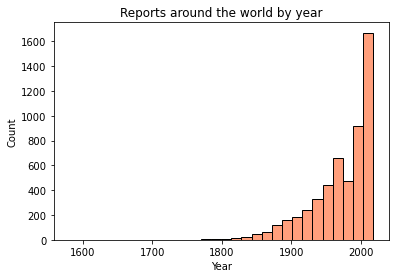

In [43]:
# Let's check the reports by year in the world

fig_reports_year = sns.histplot(x = sharks_clean["Year"], bins = 30, color = "coral").set(title='Reports around the world by year')

### Visualization: USA

In [44]:
# Let's create a new dataframe and will just keep those rows were Country == USA

country_USA = sharks_clean['Country'] != "USA"
sharks_clean_USA = sharks_clean.drop(sharks_clean[country_USA].index)

In [45]:
sharks_clean_USA.shape

(2049, 17)

In [46]:
sharks_clean_USA.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
1548,2005.09.20,20-Sep-2005,2005,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Body surfing,Clair Parrett,F,68,"Injuries to fingers, calf & heel",N,16h30,3' to 4' shark,"C. Creswell, GSAF; K. Galliard, Sun News, 9/2...",9


In [47]:
# Check visually how many reports by year
list_year_USA = sharks_clean_USA["Year"].tolist()
#print(list_year_USA)

In [48]:
# Grouping reports by binning years, just to have an idea

count_2018 = 0
count_2000 = 0
count_1980 = 0
count_1960 = 0
count_1940 = 0
count_1920 = 0

for i in list_year_USA:
    if i >= 2000:
        count_2018 +=1
    if i >= 1980 and i < 2000:
        count_2000 +=1
    if i >= 1960 and i < 1980:
        count_1980 +=1
    if i >= 1940 and i < 1960:
        count_1960 +=1
    if i >= 1920 and i < 1940:
        count_1940 +=1
    if i >= 1900 and i < 1920:
        count_1920 +=1

print("Cases 2000-2018:", count_2018, 
      ". Cases 1980-2000:", count_2000, 
      ". Cases 1960-1980:", count_1980, 
      ". Cases 1940-1960:", count_1960, 
      ". Cases 1920-1940:", count_1940, 
      ". Cases 1900-1920:", count_1920,
)

Cases 2000-2018: 997 . Cases 1980-2000: 450 . Cases 1960-1980: 235 . Cases 1940-1960: 124 . Cases 1920-1940: 78 . Cases 1900-1920: 72


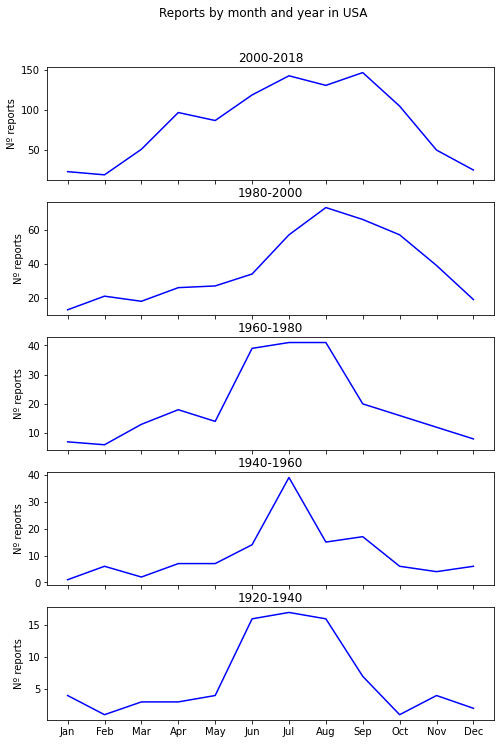

In [49]:
# Let's check the reports by year and month in USA

fig_month_year_USA, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(8,12)) # preparing the environment: graphs to be filled

fig_month_year_USA.suptitle('Reports by month and year in USA', y=0.95)

# conditions:
year_2000_2018 = (sharks_clean_USA["Year"] >= 2000)
year_1980_2000 = (sharks_clean_USA["Year"] >= 1980) & (sharks_clean_USA["Year"] < 2000)
year_1960_1980 = (sharks_clean_USA["Year"] >= 1960) & (sharks_clean_USA["Year"] < 1980)
year_1940_1960 = (sharks_clean_USA["Year"] >= 1940) & (sharks_clean_USA["Year"] < 1960)
year_1920_1940 = (sharks_clean_USA["Year"] >= 1920) & (sharks_clean_USA["Year"] < 1940)
year_1900_1920 = (sharks_clean_USA["Year"] >= 1900) & (sharks_clean_USA["Year"] < 1920)

# x axis:
x = sharks_clean_USA.groupby("Month").indices.keys()
  
# y axes:
y1 = sharks_clean_USA[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_USA[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_USA[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_USA[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_USA[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_USA[year_1900_1920].groupby("Month").size()

# 1st
plt.sca(ax[0])
plt.plot(x, y1, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('2000-2018')

# 2nd
plt.sca(ax[1])
plt.plot(x, y2, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1980-2000')

# 3rd
plt.sca(ax[2])
plt.plot(x, y3, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1960-1980')

# 4th
plt.sca(ax[3])
plt.plot(x, y4, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1940-1960')

# 5th
plt.sca(ax[4])
plt.plot(x, y5, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('1920-1940')

plt.show() 

Are attacks starting earlier and stopping later since year 2000? More cases reported in April and October when compared to other years

### Visualization: Australia

In [50]:
# As we did for USA, let's create a dataframe with only the data of Australia
country_australia = sharks_clean['Country'] != "AUSTRALIA"
sharks_clean_australia = sharks_clean.drop(sharks_clean[country_australia].index)

In [51]:
sharks_clean_australia.shape

(1226, 17)

In [52]:
sharks_clean_australia.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
2263,1997.01.25,25-Jan-1997,1997,Unprovoked,AUSTRALIA,Queensland,"Whitehaven Beach, Whitsundays Island",Snorkeling,Derek Burrows,M,27,"Left leg lacerated, punctures to right leg",N,11h00 / 11h30,1.8 m to 2.1 m [6' to 7'] shark,"Sunday Mail (QLD), 1/26/1997, p.2; Hobart Merc...",1


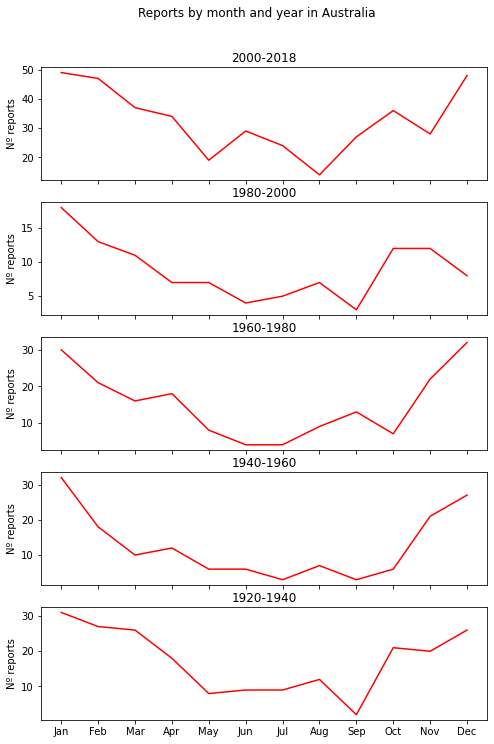

In [53]:
# Let's check the reports by year and month in USA

fig_month_year_australia, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(8,12)) # preparing the environment: graphs to be filled

fig_month_year_australia.suptitle('Reports by month and year in Australia', y=0.95)

# conditions:
year_2000_2018 = (sharks_clean_australia["Year"] >= 2000)
year_1980_2000 = (sharks_clean_australia["Year"] >= 1980) & (sharks_clean_australia["Year"] < 2000)
year_1960_1980 = (sharks_clean_australia["Year"] >= 1960) & (sharks_clean_australia["Year"] < 1980)
year_1940_1960 = (sharks_clean_australia["Year"] >= 1940) & (sharks_clean_australia["Year"] < 1960)
year_1920_1940 = (sharks_clean_australia["Year"] >= 1920) & (sharks_clean_australia["Year"] < 1940)
year_1900_1920 = (sharks_clean_australia["Year"] >= 1900) & (sharks_clean_australia["Year"] < 1920)

# x axis:
x = sharks_clean_australia.groupby("Month").indices.keys()
  
# y axes:
y1 = sharks_clean_australia[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_australia[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_australia[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_australia[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_australia[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_australia[year_1900_1920].groupby("Month").size()

# 1st
plt.sca(ax[0])
plt.plot(x, y1, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('2000-2018')

# 2nd
plt.sca(ax[1])
plt.plot(x, y2, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1980-2000')

# 3rd
plt.sca(ax[2])
plt.plot(x, y3, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1960-1980')

# 4th
plt.sca(ax[3])
plt.plot(x, y4, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1940-1960')

# 5th
plt.sca(ax[4])
plt.plot(x, y5, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('1920-1940')

plt.show() 

## Top 5 deathliest sports: Activity vs Fatality

In [54]:
# Importing again because I deleted empty columns for analysing months

sharks_clean = pd.read_csv('./data/sharks_clean.csv', encoding = "unicode_escape")

In [55]:
sharks_clean.shape

(6302, 16)

### Cleaning Activity

In [56]:
sharks_clean['Activity'].isna().sum()

544

In [57]:
sharks_clean = sharks_clean[sharks_clean['Activity'].notna()]

In [58]:
sharks_clean.shape

(5758, 16)

In [59]:
sharks_clean['Activity'].value_counts().head()

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Name: Activity, dtype: int64

Some activities could be grouped: same activity but with '-' in between words, lower cases.
Might be a good idea to group activities by different categories. For instance:
- Everything that involves surfing on a board together. Boogie and bodie boarding is also surfing.
- Everything that involves kayaking together. Include canoeing. Include rowing.
- Fishing together
- All diving related sports together.
- Wading and walking together.  

Some I can target using regex, others will not

In [60]:
# Removing inconsistencies
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace("-"," ").str.lower().str.strip()

In [61]:
sharks_clean["Activity"].value_counts().head()

surfing         976
swimming        916
fishing         444
spearfishing    340
bathing         165
Name: Activity, dtype: int64

In [62]:
list_activity = sharks_clean["Activity"].unique().tolist()

In [63]:
# print(list_activity)

Let's use regex to group the different activities

In [64]:
# def group_activities():
#     str.replace(".*(surf).*|.*(board).*", "board surfing", regex = True)
#     str.replace(".*(kayak).*|.*(canoe).*|.*(rowing).*", "kayaking & related", regex = True)
#     str.replace(".*(diving).*", "diving", regex = True)
#     str.replace(".*(boat).*", "sailing", regex = True)
#     str.replace(".*(snorkel).*", "snorkeling", regex = True)
#     str.replace(".*(bathing).*|.*(swimming).*|.*(swim).*", "swimming", regex = True)
#     str.replace(".*(spearfishing).*", "spear-fishing", regex = True)
#     str.replace("[\w]+?(fishing).*|^(fishing).*|\s(fishing).*", "fishing", regex = True)
#     str.replace(".*(walking).*|.*(standing).*|.*(treading).*", "wading", regex = True)

In [65]:
# Write a dictionary of activities (regex pattern in value) and for loop to replace.

In [66]:
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(surf).*|.*(board).*", "board surfing", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(kayak).*|.*(canoe).*|.*(rowing).*", "kayaking & related", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(diving).*", "diving", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(boat).*", "sailing", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(snorkel).*", "snorkeling", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(bathing).*|.*(swimming).*|.*(swim).*", "swimming", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(spearfishing).*", "spear-fishing", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace("[\w]+?(fishing).*|^(fishing).*|\s(fishing).*", "fishing", regex = True)
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(".*(walking).*|.*(standing).*|.*(treading).*", "wading", regex = True)

In [67]:
sharks_clean["Activity"].value_counts().head(10)

board surfing         1562
swimming              1231
fishing                575
diving                 550
spear-fishing          382
wading                 336
sailing                162
kayaking & related     120
snorkeling             100
sharkfishing            18
Name: Activity, dtype: int64

In [68]:
# Getting all activities and value counts in to a dictionary
# dict_activity = sharks_clean["Activity"].value_counts().to_dict()

In [69]:
# Selecting only those that have value counts < 100 (the "other activities")
# dict_other_activity = {key:val for key, val in dict_activity.items() if val < 100}

In [70]:
# Replacing those that are in dict_other_activity with 'other activity' using apply and lambda
# sharks.clean["Activity"] = sharks_clean["Activity"].apply(lambda x: x.str.replace(x, "other activity") if x in dict_other_activity)

### Cleaning Fatality 

In [71]:
# Checking NaNs
sharks_clean["Fatal (Y/N)"].isna().sum()

414

In [72]:
# Removing NaNs
sharks_clean = sharks_clean[sharks_clean['Fatal (Y/N)'].notna()]
sharks_clean["Fatal (Y/N)"].isna().sum()

0

In [73]:
# Strip spaces and see if we need to remove manually
sharks_clean["Fatal (Y/N)"] = sharks_clean["Fatal (Y/N)"].str.strip().str.upper()
sharks_clean["Fatal (Y/N)"].value_counts() # Remove the 'y'

N          4023
Y          1283
UNKNOWN      36
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [74]:
fatal_remove = (sharks_clean["Fatal (Y/N)"] == "M") | (sharks_clean["Fatal (Y/N)"] == "UNKNOWN") | (sharks_clean["Fatal (Y/N)"] == "2017")
sharks_clean = sharks_clean.drop(sharks_clean[fatal_remove].index)

In [75]:
sharks_clean["Fatal (Y/N)"].value_counts()

N    4023
Y    1283
Name: Fatal (Y/N), dtype: int64

### Visualization

[Text(0.5, 1.0, 'Top deathliest activities')]

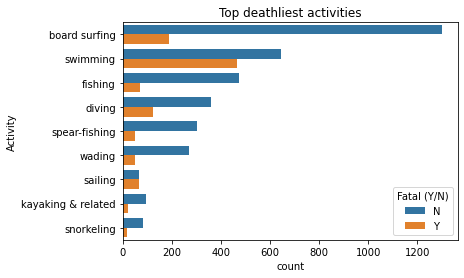

In [76]:
fig_activity = sns.countplot(y="Activity", data=sharks_clean, hue="Fatal (Y/N)", order=sharks_clean.Activity.value_counts().iloc[:9].index)
fig_activity.set(title='Top deathliest activities')